In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('statistics-measures-of-central-tendency')
jovian.set_colab_id('1-QIurHhFK-M8WzwYSAkM7esIYCh9lcNh')

# Measures of Central Tendency | Statistics for Data Science

This tutorial is a part of the [Zero to Data Analyst Bootcamp by Jovian](https://www.jovian.ai/data-analyst-bootcamp)

![](https://i.imgur.com/qgny42s.jpg)

Statistics is the discipline of using mathematics to understand data. We use measures of central tendency to summarize, discover and share useful information about data, primarily for gaining insight and making better decisions. The topics covered today will help you answer the following types of questions:

- How much will you earn after graduating from university?
- How hot is it going to be in the summer this year?
- Should your investment portfolio be focused on diversified?
- Which movie should you watch this weekend?
- How many registered users will your website have one year from now?

This tutorial covers the following topics:
 
- Average / arithmetic mean
- Median, percentiles, quartiles and range
- Mode and frequency tables
- Variance and standard deviation
- Growth rate and geometric mean

### How to Run the Code

The best way to learn the material is to execute the code and experiment with it yourself. This tutorial is an executable [Jupyter notebook](https://jupyter.org). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.



## Average / Arithmetic Mean

The average or arithmetic mean of a set of numbers is the sum of the numbers divided by the how many numbers are being averaged. It's the simplest way to come up with a single number to summarize a set of numbers.

$$\textrm{Average} = \frac {\textrm{Sum of values}} {\textrm{No. of values}}$$

$$\mu = \frac{x_1 + x_2 + ... + x_n} {n}$$

The symbol $\mu$ (pronounced "myu") is often used to denote the mean. We can define a function `mean` to implement this formula.

In [1]:
def mean(nums):
    total = 0
    for num in nums:
        total += num
    return total / len(nums)

In [2]:
import numpy as np

def mean(nums):
    total=0
    for i in nums:
        total = total + i
    return total / len(nums)


In [3]:
mean([3, 5, 7, 8, 10])

6.6

Let's apply the formula to a few questions.

> **QUESTION**: The following table shows the number of new notebooks created every day on Jovian for the past week. Calculate the average number of notebooks created per day.
>
> <img src="https://i.imgur.com/EScHTCY.png" width="200">

In [4]:
notebooks = [281, 276, 338, 298, 382, 291, 269]

In [5]:
notebooks_per_day = mean(notebooks)
notebooks_per_day

305.0

In [6]:
print("An average of {} notebooks were created every day on Jovian over the last 7 days.".format(notebooks_per_day))

An average of 305.0 notebooks were created every day on Jovian over the last 7 days.


### Using Numpy to Compute Mean

The `numpy` library provides several helper functions for computing common statistical measures. We'll learn more about numpy in a lecture about numerical computing with Python. Check out the official documentation to learn more about the [mathematical](https://numpy.org/doc/stable/reference/routines.math.html) and [statistical](https://numpy.org/doc/stable/reference/routines.statistics.html) functions it provides. 

Let's use `numpy` to compute the average number of notebooks created per day.

In [7]:
# Install the numpy library
!pip install numpy --upgrade --quiet

In [8]:
# Import the numpy module with an alias
import numpy as np

In [9]:
# Use a function from the numpy module
np.mean(notebooks)

305.0

As expected, we get the same result. Try solving the following question using `np.mean`.

> **EXERCISE**: Every time someone runs `jovian.commit`, a new *version* of a Jupyter notebook is uploaded to Jovian. The following table shows the number of notebook versions created every day on Jovian for the past 7 days. Calculate the average number of notebooks versions created per day.
>
> <img src="https://i.imgur.com/Vloo57d.png" width="240">

In [10]:
versions = [1669, 1632, 1747, 1936, 1859, 1497, 1270]

In [11]:
np.mean(versions)

1658.5714285714287

### Combining Data From Two Columns

Sometimes the given data require some interpretation and processing before we can compute the average.

> **QUESTION**: The following table shows the number of notebooks created every day and the number of notebook versions created every day on Jovian for the past 7 days. One notebook can have several versions. Can you find the average number of versions per notebook using this information?
>
> <img src="https://i.imgur.com/TTtDw9N.png" width="320">

In [12]:
notebooks = [281, 276, 338, 298, 382, 291, 269]
versions = [1669, 1632, 1747, 1936, 1859, 1497, 1270]

Recall the formula for computing the average:

$$\textrm{Average} = \frac {\textrm{Sum of values}} {\textrm{No. of values}}$$

In this case, we wish to find the average number of versions per notebook. The way to do this would be:

$$\textrm{Average Versions} = \frac{v_1 + v_2 + ... + v_n} {n} = \frac {\textrm{Total no. of versions}} {\textrm{Total no. of notebooks}}$$

where $n$ is the total number of notebooks created over the last week and $v_i$ is the no. of versions recorded for the $i^{th}$ notebook. 

We can use the `np.sum` function to compute the sum of values in lists `notebooks` and `versions`.

In [13]:
avg_versions = np.sum(versions) / np.sum(notebooks)
avg_versions

5.437939110070258

Thus, it appears we have $5.43$ versions per notebook.

However, there's a problem with the above calculation! It is possible that some versions recorded last week belong to notebooks that were created sometime before the last 7 days. So, instead of counting the total no. of notebooks created in the last 7 days, we should count the total number of notebooks updated in the last 7 days.

As a data analyst, it's important for you look out for such subtle issues/shortcomings in data provided, and state your assumptions clearly when presenting results. In many cases, you may need to request for additional information.

There's yet another problem with the above result. Can you figure out what it is?


-- to find correct numberb of version per notebook, we need data for version numbers of notebooks created on on that week

### Weighted Averages

Sometimes you may need to apply a weight to each number. 

> **EXERCISE**: The  The following table shows population and the per capita GDP of various states (provinces) in India. Compute per capita GDP for the entire country. The table is also available as a CSV file [here](https://gist.githubusercontent.com/aakashns/b83c25b654bdf20c085382f3d28bb15c/raw/046a19a942ef5a96d33c2e7b2dc5a9ce1a35e868/india_per_capita_gdp_by_state.csv).

<img src="https://i.imgur.com/YJyfGpr.png" width="320">


In [14]:
state_gdp_url = 'https://gist.githubusercontent.com/aakashns/b83c25b654bdf20c085382f3d28bb15c/raw/046a19a942ef5a96d33c2e7b2dc5a9ce1a35e868/india_per_capita_gdp_by_state.csv'

Before we solve the problem, we need a way to download and process a CSV file. We can use the `pandas` library for doing this. 

In [33]:
# Install the library
!pip install pandas --upgrade --quiet

In [15]:
# Import the library as an alias
import pandas as pd

The `read_csv` function from Pandas can be used to read a CSV file, from a local filesystem or from a URL. It returns a *data frame*, which is conceptually similar to a table in a spreadsheet.

In [16]:
dataframe = pd.read_csv(state_gdp_url)
dataframe

,state,population,gdp_per_capita
0,Andaman & Nicobar,380581,2890
1,Andhra Pradesh,49577103,2824
2,Arunachal Pradesh,1383727,2457
3,Assam,31205576,1410
4,Bihar,104099452,826
5,Chandigarh,1055450,5590
6,Chhattisgarh,25545198,1801
7,Delhi,16787941,7148
8,Goa,1458545,6856
9,Gujarat,60439692,3475


To access the values in a column, we can use the dictionary indexing notation and pass the column name as the key e.g. `dataframe['population']`. The result is a Pandas *series* which works just like a Python list. 

In [17]:
population = dataframe['population']
gdp_per_capita = dataframe['gdp_per_capita']

In [18]:
population[:5]

0       380581
1     49577103
2      1383727
3     31205576
4    104099452
Name: population, dtype: int64

In [19]:
gdp_per_capita[3]

1410

We'll learn a lot more about Pandas in a future lesson. 

Now that you have the `population` and `gdp_per_capita` as lists of numbers, can you answer the question? 

*Hint*: The GDP per capita of the country is the weighted average of per capita GDPs of individual states, with populations used as weights. Use `np.multiply` to perform element-wise multiplication.

In [20]:
x =[1,2,3,4]
y = [5,1,5,2]

In [21]:
np.sum(np.multiply(gdp_per_capita,population))/np.sum(population)

2437.127948254339

> **EXERCISE:** Download [this CSV file](https://gist.githubusercontent.com/aakashns/873875a38d83a46820a6a8c17718a7e5/raw/0387122b1300607fc7ec73f75f0281d5d07ad65f/countries_data.csv) containing country-wise population and GDP per capita. Use it to calculate the GDP per capita for the entire world.



In [22]:
countries_csv = 'https://gist.githubusercontent.com/aakashns/873875a38d83a46820a6a8c17718a7e5/raw/0387122b1300607fc7ec73f75f0281d5d07ad65f/countries_data.csv'

In [23]:
dataframe = pd.read_csv(countries_csv)
population = dataframe['Population']
gdp_per_capita=dataframe['GDP ($ per capita)']


In [24]:
np.sum(np.multiply(population,gdp_per_capita))/np.sum(population)

8079.343958974139

### Outliers

The mean isn't always a good measure of central tendency because it is susceptible to *outliers* i.e. individual values which lie far outside the normal range of values. Consider the following example, which illustrates the **Michael Jordan Fallacy**.

> **EXERCISE**: The following table shows the starting salary of a class of 20 geography graduates from the University of North Carolina in 1986. Person 7 is Michael Jordan, who became a professional basketball player upon graduating. Calculate the average salary for the class. Can you use the number as an estimate of how much a student can expect to earn in 1987?
>
> <img src="https://i.imgur.com/cJHEEEt.png" width="240">
> 

In [25]:
salaries = [22000, 21000, 26000, 31000, 19000, 21500, 800000, 24500, 25000, 24000]

In [26]:
np.mean(salaries)

101400.0

Can you use the average as an estimate of how much a student can expect to earn in 1987?

Upon calculating the averages, you will notice that the average salary for the class is 4 times higher than the salary of 9 out of 10 graduates. Michael Jordan is clearly an outlier in this case, and his salary has a disproportionate impact on the average.

![](https://i.imgur.com/vgG29mb.png)

While it may seem obvious that the average is not representative of the population in this case, this will not be apparent if you were simply quoting the average without showing the actual data. Universities often cite average salaries of graduates in brochures and advertisements, which in most cases include a few outliers. Whenever you come across an average, keep an eye out for the Michael Jordan fallacy.

When the data contains outliers, we can use a different measure of central tendency: the median.

Let's save our work before continuing.

In [27]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pritesh009/statistics-measures-of-central-tendency" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/pritesh009/statistics-measures-of-central-tendency


'https://jovian.ai/pritesh009/statistics-measures-of-central-tendency'

## Median, Percentiles, Quartiles and Range

![](https://i.imgur.com/UPiZkuE.png)


### Median

The median of a set of numbers is the *middle number* of the set, after the numbers have been arranged in increasing order. E.g. the median of the numbers $3, 7, 10, 55, 97$ is $10$. 

When the size of the set is even, there's no single middle number. In this case, the median is the average of the two middle numbers. E.g. the median of $3, 5, 21, 33, 42, 300$ is $(21 + 33)/2 = 27$.



> **EXERCISE**: Write a function to find a median of a list of numbers. Ensure that your function does NOT modify the input list.



In [28]:
nums3 = [3, 7, 10, 55, 97]
nums4 = [900,500,900,700,100]

In [29]:
np.median(nums4)

700.0

In [30]:
def median(nums):
    i=len(nums)
    if i % 2 == 1:
        pos = nums[int(i/2)]
    else:
        pos = (nums[int(i/2)-1] + nums[int(i/2)])/ 2
    return pos

Test your implementation with the following examples.

In [31]:
nums1 = [3, 7, 10, 55, 97]
nums2 = [3,5,21,33,42,300]

In [32]:
median(nums1)

10

In [33]:
median(nums2)

27.0

As you might expect, `numpy` provides a function to compute the median of a set of numbers.

In [34]:
np.median(nums1)

10.0

In [35]:
np.median(nums2)

27.0



> **QUESTION**: Download [this CSV file](https://gist.githubusercontent.com/aakashns/5596c1d2d22d3c1ac287c8bf89d76a05/raw/ae588cb3711ba4ef441b578fafb47e911b27dcaf/billionaires.csv) containing information about the 100 richest people in the world according to Forbes. What is the median net worth of the 100 richest people in the world?

We can download and process this file using the `read_csv` function from Pandas and compute the median using the `median` function from numpy.

In [99]:
richest_url = 'https://gist.githubusercontent.com/aakashns/5596c1d2d22d3c1ac287c8bf89d76a05/raw/990fdd64d99cf5586fe19c83daf72988fb4a4746/billionaires.csv'

In [100]:
dataframe = pd.read_csv(richest_url)

In [101]:
dataframe

,rank,name,net_worth_billions_usd,age,country,source,industries
0,1,JEFF BEZOS,113.0,56,United States,Amazon,Technology
1,2,BILL GATES,98.0,64,United States,Microsoft,Technology
2,3,BERNARD ARNAULT & FAMILY,76.0,71,France,LVMH,Fashion & Retail
3,4,WARREN BUFFETT,67.5,89,United States,Berkshire Hathaway,Finance & Investments
4,5,LARRY ELLISON,59.0,75,United States,software,Technology
...,...,...,...,...,...,...,...
95,96,LI SHUFU,12.4,56,China,automobiles,Automotive
96,96,HASSO PLATTNER & FAMILY,12.4,76,Germany,software,Technology
97,98,LIU YONGHAO & FAMILY,12.3,68,China,agribusiness,Service
98,98,STEFAN QUANDT,12.3,53,Germany,BMW,Automotive


The column `net_worth_billions_usd` contains the required information.

In [102]:
net_worth = dataframe['net_worth_billions_usd']

In [40]:
import numpy as np
median_net_worth = np.median(net_worth)

In [41]:
print('The median net worth among the 100 richest people in the world is ${} billion.'.format(median_net_worth))

The median net worth among the 100 richest people in the world is $17.05 billion.


Compare this with the average:

In [42]:
np.mean(net_worth)

25.576

The average is 47% higher than the median. Even among the richest, there are outliers!

> **EXERCISE**: Use the above dataset to compute the median and average ages of the 100 richest people. Which is a better measure of central tendency in this case?

In [44]:
age = dataframe['age']

In [45]:
np.mean(age)

66.92

In [46]:
np.median(age)

67.5

In [59]:
np.max(age)

92

In [47]:
dataframe['age'].head(100)

0     56
1     64
2     71
3     89
4     75
      ..
95    56
96    76
97    68
98    53
99    51
Name: age, Length: 100, dtype: int64

> **EXERCISE**: The following table shows the starting salary of a class of 20 geography graduates from the University of North Carolina in 1986. Person 7 is Michael Jordan, who became a professional basketball player upon graduating. Calculate the median salary for the class. How does it compare with the average? Can you use the number as an estimate of how much a student can expect to earn in 1987?
>
> <img src="https://i.imgur.com/cJHEEEt.png" width="240">
> 

In [48]:
salaries = [22000, 21000, 26000, 31000, 19000, 21500, 800000, 24500, 25000, 24000]

In [49]:
np.mean(salaries)

101400.0

In [50]:
np.median(salaries)

24250.0

> **EXERCISE**: Download [this CSV file](https://gist.githubusercontent.com/aakashns/f7d8f99c391f0727270e27e157460e3a/raw/2128978f3297f39ca4237a9ff843c80dd44ca4e3/stocks_returns.csv) containing information about the returns on stock price for several public companies. Find the average returns and the median returns. Based on this information, can you explain if it's better to have a diversified or a focused investment portfolio?

In [107]:
stocks_url = 'https://gist.githubusercontent.com/aakashns/7d96d0b9af1c897fe30d1e782314f68e/raw/dc30a5d3e70683407fd16a4a14c56eb05ae82bcc/stock_returns.csv'

In [108]:
dataframe=pd.read_csv(stocks_url)

In [109]:
dataframe.head(5)

,symbol,return
0,KRNT,57.38
1,TCX,23.95
2,IIN,39.05
3,ATHM,37.19
4,SITO,44.31


In [110]:
stock_return =dataframe['return']

In [55]:
np.median(stock_return)

38.14

In [111]:
np.mean(stock_return)

62.49580000000002

> **EXERCISE**: What is the relationship between the mean and median of a set of values? Is the mean always greater than the median (or vice versa)? Can they be equal? Demonstrate with examples.

Let's save our work before continuing.

In [57]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "pritesh009/statistics-measures-of-central-tendency" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/pritesh009/statistics-measures-of-central-tendency


'https://jovian.ai/pritesh009/statistics-measures-of-central-tendency'

### Percentiles

The median divides the dataset into two halves, each with 50% of the observations. A percentile is the generalization of Median. The K-th percentile is a number equal to or larger than K % of the values in the set.

In [61]:
nums = [2, 4, 6, 12, 34, 89, 97, 125, 324, 982, 1024]

The `np.percentile` function can be used to compute the k-th percentile.

In [62]:
percentile_90 = np.percentile(nums, 90)
percentile_90

982.0

Verify that `percentile_90` is greater than or equal to 90% of the values in the set. 



> **EXERCISE**: Download [this CSV file](https://gist.githubusercontent.com/aakashns/5596c1d2d22d3c1ac287c8bf89d76a05/raw/ae588cb3711ba4ef441b578fafb47e911b27dcaf/billionaires.csv) containing information about the 100 richest people in the world according to Forbes. What is the ratio of the 90-th percentile and 10-the percentile net worth in the list?


In [116]:
richest_url = 'https://gist.githubusercontent.com/aakashns/5596c1d2d22d3c1ac287c8bf89d76a05/raw/990fdd64d99cf5586fe19c83daf72988fb4a4746/billionaires.csv'
dataframe=pd.read_csv(richest_url)
net_worth=dataframe['net_worth_billions_usd']


In [63]:
richest_url = 'https://gist.githubusercontent.com/aakashns/5596c1d2d22d3c1ac287c8bf89d76a05/raw/990fdd64d99cf5586fe19c83daf72988fb4a4746/billionaires.csv'

In [64]:
dataframe=pd.read_csv(richest_url)

In [65]:
net_worth=dataframe['net_worth_billions_usd']

In [66]:
np.percentile(net_worth,90)/np.percentile(net_worth,10)

4.067744418783681

In [37]:
np.percentile(net_worth,10)

12.99

> **EXERCISE**: Download [this CSV file](https://gist.githubusercontent.com/aakashns/f7d8f99c391f0727270e27e157460e3a/raw/2128978f3297f39ca4237a9ff843c80dd44ca4e3/stocks_returns.csv) containing information about the returns on stock price for several public companies. What is the ratio of returns for the 95th percentile and 5th percentile in the list?

In [ ]:
stocks_url = 'https://gist.githubusercontent.com/aakashns/7d96d0b9af1c897fe30d1e782314f68e/raw/dc30a5d3e70683407fd16a4a14c56eb05ae82bcc/stock_returns.csv'
dataframe=pd.read_csv(stocks_url)
stock_return =dataframe['return']

In [67]:
stocks_url = 'https://gist.githubusercontent.com/aakashns/7d96d0b9af1c897fe30d1e782314f68e/raw/dc30a5d3e70683407fd16a4a14c56eb05ae82bcc/stock_returns.csv'

In [68]:
dataframe=pd.read_csv(stocks_url)

In [73]:
stock_return =dataframe['return']
np.percentile(stock_return,5)

24.1545

In [74]:
np.percentile(stock_return,95)/np.percentile(stock_return,5)

9.057442712538034

In [72]:
stock_return =dataframe['return']
np.percentile(stock_return,95)

218.77799999999993

> **EXERCISE**: The following table shows a summary of test scores for a class of students. 2 students scored 1 mark in the test, 3 students scored 2 marks, 8 students scored 3 marks and so on. Find the median score for the class.
>
> <img src="https://i.imgur.com/AD7m3gJ.png" width="240">
> 
> This representation of the data is also known as a frequency table, because it shows how often a certain value occurs in the dataset.

In [ ]:
scores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
num_students = [2, 3, 8, 7, 13, 18, 23, 12, 5, 1] 
nums =[]
for i in range(len(scores)):
    score = scores[i]
    count = num_students[i]
    #print(count)
    for j in range(count):
        #print(range(count))
        nums.append(score)
np.median(nums)


In [86]:
scores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
num_students = [2, 3, 8, 7, 13, 18, 23, 12, 5, 1] 

In [88]:
nums =[]
for i in range(len(scores)):
    score = scores[i]
    count = num_students[i]
    #print(count)
    for j in range(count):
        #print(range(count))
        nums.append(score)
np.median(nums)
        

6.0

In [89]:
np.sum(num_students)

92

### Quartiles and Range

Quartiles are numbers that divide a dataset into 4 equal parts (or quarters). A dataset has three quartiles:

1. **1st Quartile or Q1**: 25% of values lie below it i.e. it's the 25th percentile
2. **2nd Quartile or Q2**: 50% of values lie below it i.e. it's the median or 50th percentile
3. **3rd Quartile or Q3**: 75% of values lie below it i.e. it's the 75th percentile

<img src="https://i.imgur.com/SQXnns4.png" width="360">

> **EXERCISE:** Write a function `quartiles` which computes the quartiles for a set of numbers.
> 
> *Hint*: Use `np.percentile`.

In [91]:
def quartiles(nums):
    return np.percentile(nums,25),np.percentile(nums,50),np.percentile(nums,75)

In [92]:
nums = [1, 3, 3, 4, 5, 6, 6, 7, 8, 8]

In [93]:
quartiles(nums)

(3.25, 5.5, 6.75)

The first and third quartiles have fractional values because no specific number in the set achieves a perfect split.

The range of a set of numbers is defined by two values: the minimum and the maximum. Ranges and quartiles are often used together to get a sense of the spread and distribution of values in a dataset.

> **EXERCISE**: Write a function `datarange` to determine the range of a list of numbers. 

Note that Python already has a built-in function called `range` (which is different from the statistical range defined here), so we'll name our function `datarange`.

In [95]:
def datarange(nums):
    # write code here
    return np.min(nums),np.max(nums)

In [96]:
datarange(nums)

(1, 8)

Let's try a few exercises with quartiles and ranges.

> **EXERCISE**: Compute the quartiles for the net worth and age of the 100 richest people in the world using the relevant dataset from the previous section. 

In [104]:
quartiles(net_worth)

(14.075, 17.05, 28.450000000000003)

In [105]:
quartiles(age)

(56.0, 67.5, 79.0)

>  **EXERCISE**:  Download [this CSV file](https://gist.githubusercontent.com/aakashns/f7d8f99c391f0727270e27e157460e3a/raw/2128978f3297f39ca4237a9ff843c80dd44ca4e3/stocks_returns.csv) containing information about the returns on stock price for several public companies and compute the quartiles for the returns. 

In [123]:
stocks_url = 'https://gist.githubusercontent.com/aakashns/7d96d0b9af1c897fe30d1e782314f68e/raw/dc30a5d3e70683407fd16a4a14c56eb05ae82bcc/stock_returns.csv'
dataframe=pd.read_csv(stocks_url)
stock_return =dataframe['return']

In [124]:
quartiles(stock_return)

(28.604999999999997, 38.14, 53.5125)

### Box and Whiskers Plot

The range and quartiles of a set of numbers are often plotted using a "box-and-whiskers" plot (sometimes just called a box plot). 

We can use the `seaborn

In [113]:
# Import the library
!pip install seaborn --upgrade --quiet

In [114]:
import seaborn

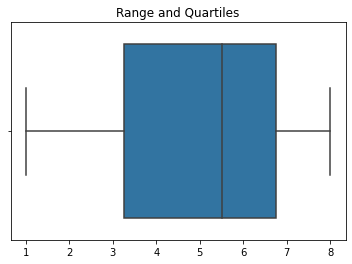

In [115]:
nums = [1, 3, 3, 4, 5, 6, 6, 7, 8, 8]

seaborn.boxplot(x=nums).set_title('Range and Quartiles');

The box represents the data between the first and third quartiles i.e. the middle 50% of values. The line cutting the box indicates the median. The lines or "whiskers" on each ends indicate the lower 25% and upper 25% of the data. The entire plot is bounded by the range of the data.

We'll learn more about plotting in a lot more detail in a later lesson.

> **EXERCISE**: Create a box and whiskers plot to visualize the range and quartiles for the net worth of the hundred richest people in the world.

In [118]:
richest_url = 'https://gist.githubusercontent.com/aakashns/5596c1d2d22d3c1ac287c8bf89d76a05/raw/990fdd64d99cf5586fe19c83daf72988fb4a4746/billionaires.csv'
dataframe=pd.read_csv(richest_url)
net_worth=dataframe['net_worth_billions_usd']

Text(0.5, 1.0, 'Range and Qurtile')

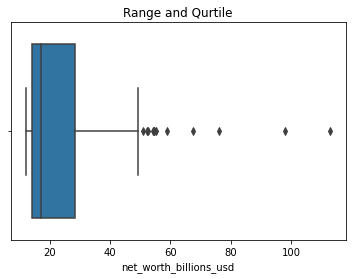

In [122]:
seaborn.boxplot(x=net_worth).set_title('Range and Qurtile')

> **EXERCISE**: Download [this CSV file](https://gist.githubusercontent.com/aakashns/f7d8f99c391f0727270e27e157460e3a/raw/2128978f3297f39ca4237a9ff843c80dd44ca4e3/stocks_returns.csv) containing information about the returns on stock price for several public companies. Create a box and whiskers plot to visualize the range and quartiles of the returns.

<AxesSubplot:xlabel='return'>

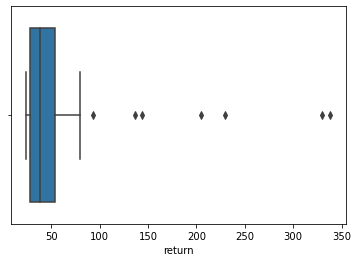

In [126]:
seaborn.boxplot(x=stock_return)

Let's save our work before continuing.

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/statistics-measures-of-central-tendency" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/statistics-measures-of-central-tendency


'https://jovian.ai/aakashns/statistics-measures-of-central-tendency'

## Mode and Frequency Tables

The mode of a set of values is simply the most frequently occurring value in the set. E.g. the mode of the list `[1, 2, 3, 4, 4, 4, 4, 4, 5, 6, 7, 7, 7, 8]` is `4` because it occurs more times than any other value.

If there isn't a single value that occurs most frequently, all the values are occur most frequently are modes. The data is said to be *multimodal* in such cases. E.g. The set `[3, 1, 4, 1, 5, 4]` has two modes, `1` and `4`, which both occur twice.

Unlike mean and median, mode is not limited to numbers, it is defined for any set of values. The mode of the set of values `['red', 'green', 'blue', 'green', 'red', 'green', 'green']` is `'green'`.


> **QUESTION**: Write a function to compute the mode(s) of a list of values.

Before we can find the mode, we need a way to count the number of times each value in the list occurs. Let's create a helper function `count_occurrences` to do this.

In [19]:
def count_occurrences(elements):
    # Create a dictionary of results
    counts = {}
    # Go over each element in the list
    for element in elements:
        # Check we already have an entry for it
        if element in counts:
            # Increment the count
            counts[element] += 1
        else:
            # If not present already, create an entry
            counts[element] = 1
    # Return the dictionary of results
    return counts

`count_occurrences` returns a dictionary with unique values from the list as keys and the no. of times they occur in the list as values.

In [132]:
nums1 = [1, 2, 3, 4, 4, 4, 4, 4, 5, 6, 7, 7, 7, 8]
nums2 = [3, 1, 4, 1, 5, 4] 
vals1 = ['red', 'green', 'blue', 'green', 'red', 'green', 'green']

In [133]:
count_occurrences(nums1)

{1: 1, 2: 1, 3: 1, 4: 5, 5: 1, 6: 1, 7: 3, 8: 1}

In [134]:
count_occurrences(nums2)

{3: 1, 1: 2, 4: 2, 5: 1}

In [135]:
count_occurrences(vals1)

{'red': 2, 'green': 4, 'blue': 1}

The result of `count_occurrences` is also called a frequency table, as it shows how frequently each value occurs in the dataset. It is often shown in a tabular form:

<img src="https://i.imgur.com/MeRJqAg.png" width="240">

We can now use `count_occurrences` to define the `mode` function.

In [14]:
def mode(elements):
    # Count the no. of occurences of each value
    counts = count_occurrences(elements)
    # Get the maximum no. of occurences of any value
    max_count = max(counts.values())
    # Make a list of the matching elements
    results = []
    # Iterate over unique elements
    for element in counts:
        # Check if its count matches max_count
        if counts[element] == max_count:
            # Add it to results
            results.append(element)
    return results

Let's try out the mode function with some examples.

In [137]:
mode(nums1)

[4]

In [138]:
mode(nums2)

[1, 4]

In [139]:
mode(vals1)

['green']

The function works as expected! The numpy module doesn't provide a function to compute the mode of a set of numbers, so we'll continue using our custom function.

> **EXERCISE**: As a data analyst at the online streaming platform FlixNet, you've been asked to come up with a simple strategy to recommend new movies for users to watch. FlixNet allows users to connect their social accounts, so you have a list of friends for every user. You believe that users would like to watch movies which most of their friends have watched.
>
> To illustrate the strategy, let's look at the relevant data for one FlixNet user: Alfred. The table below shows the movies watched by friends of Alfred. We've excluded the movies Alfred has already watched from this list. This file is available as [a CSV here](https://gist.githubusercontent.com/aakashns/6b44891b426e90f771d3b147a0bb77d5/raw/9a3b8d89947c2e427b9c68454b3d66e7eae047e3/friends_movies.csv).
>
> Which movie should you recommend to Alfred?
> 
> <img src="https://i.imgur.com/qYyTa7n.png" width="240">



In [140]:
movies_url = 'https://gist.githubusercontent.com/aakashns/6b44891b426e90f771d3b147a0bb77d5/raw/9a3b8d89947c2e427b9c68454b3d66e7eae047e3/friends_movies.csv'

In [141]:
dataframe = pd.read_csv(movies_url)

In [143]:
dataframe.head(5)

,friend_name,movie
0,Bruce,Interstellar
1,Jane,The Prestige
2,Samir,Mememto
3,Bruce,Tenet
4,Samir,The Dark Knight


In [145]:
movie = dataframe['movie']

In [146]:
mode(movie)

['The Dark Knight']

> **EXERCISE**: Your friend Alex designs shoes as a hobby, and you've persuaded her to start selling her shoes online. You've found a vendor who can manufacture, store and ship the shoes for you. You've requested some sample units from the vendor to inspect the quality of the shoes. However, the vendor does not manufacture fewer than 100 units of single shoe size. Which shoe size would you like them to manufacture?
> 
> You may find [this CSV file](https://gist.githubusercontent.com/aakashns/0754b375153cd74350315a6eedd2841e/raw/dd399f8f779b10fce4eaa021c309ebb6d9cc974e/shoe_sizes.csv) containing a list of shoes recently sold by an online store useful.

In [148]:
shoes_url = 'https://gist.githubusercontent.com/aakashns/0754b375153cd74350315a6eedd2841e/raw/dd399f8f779b10fce4eaa021c309ebb6d9cc974e/shoe_sizes.csv'

In [149]:
dataframe = pd.read_csv(shoes_url)

In [150]:
dataframe.head(5)

,Company,Price,Size
0,Puma,"₹2,969",9
1,Puma,"₹2,279",8
2,Deals4you,₹397,7
3,MILESWALKER,₹379,11
4,Chevit,₹389,7


In [155]:
shoe_size = dataframe['Size']
mode(shoe_size)

[9]

Sometimes you may be given a frequency table instead of a full list of numbers.

> **EXERCISE**: The following table shows the votes earned by candidates competiting the 2000 US Presidential Election. This table is also available [as a CSV here](https://gist.githubusercontent.com/aakashns/0f137d0fd21635f82ee1a81d8bd1a804/raw/12006b199ad5b3f4b20c853daeb8bb0e1b9847e7/us_2000_results.csv).
>
> <img src="https://i.imgur.com/f8hcMh9.png" width="480">
>
> *Hint*: Define a function `frequency_table_mode` which compute the mode from a frequency table.

In [161]:
election_results_url = 'https://gist.githubusercontent.com/aakashns/0f137d0fd21635f82ee1a81d8bd1a804/raw/12006b199ad5b3f4b20c853daeb8bb0e1b9847e7/us_2000_results.csv'
dataframe=pd.read_csv(election_results_url)
elc_vote=dataframe['Votes']
elc_candidate =dataframe['Candidate']
dataframe

,Candidate,Party,State,Votes
0,Howard Phillips,Constitution,Virginia,98020
1,John Hagelin,Natural Law,Iowa,83714
2,Ralph Nader,Green,Connecticut,2882955
3,George Walker Bush,Republican,Texas,50456002
4,Harry Browne,Libertarian,Tennessee,384431
5,Albert Arnold Gore Jr.,Democratic,Tennessee,50999897
6,Pat Buchanan,Reform,Virginia,448895


In [171]:
def frequency_table_mode(values, counts):
    max_num=np.max(counts)
    for i in range(len(counts)):
        if counts[i] == max_num:
            break
    
    return (values[i]) 

In [173]:
frequency_table_mode(elc_candidate,elc_vote)

'Albert Arnold Gore Jr.'

Let's save our work before continuing.

In [65]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/statistics-measures-of-central-tendency" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/statistics-measures-of-central-tendency


'https://jovian.ai/aakashns/statistics-measures-of-central-tendency'

## Skewness of Data

The relative order of mean, median and mode indicates the direction of skewness in the dataset. Skewness, in statistics, is the degree of asymmetry observed in a set of observations. The image below([source](https://medium.com/@nhan.tran/mean-median-an-mode-in-statistics-3359d3774b0b)) shows three possible scenarios:

![](https://miro.medium.com/max/4800/0*wHMvuwRa_YF9SFwY.png)


The x-axis indicates the values of the numbers in the dataset and the y-axis indicates the no. of times each value occurs. There's no one single right measure of central tendency, it is always better to look at multiple measures to form a fuller picture of distribution of values in the dataset.




> **EXERCISE**: The following table shows a summary of test scores for a class of students. 2 students scored 1 mark in the test, 3 students scored 2 marks, 8 students scored 3 marks and so on. Compute the mean, median and mode of the scores. Does the data skew towards one side or the other?
>
> <img src="https://i.imgur.com/AD7m3gJ.png" width="240">
> 

In [15]:
scores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
num_students = [2, 3, 8, 7, 13, 18, 23, 12, 5, 1] 


In [20]:
import numpy as np
nums =[]
for i in range(len(scores)):
    score = scores[i]
    count = num_students[i]
    #print(count)
    for j in range(count):
        #print(range(count))
        nums.append(score)
np.median(nums)

6.0

In [22]:
mode(nums)

[7]

In [5]:
np.mean(nums)

5.923913043478261

Apart from measures of central tendency, we also often compute measures of variability or spread.

## Variance and Standard Deviation

The **variance** of a set of numbers measures how far each number is from the mean of the set. It is denoted by the symbol $\sigma^2$ (pronounced "sigma squared") and is defined by the formula:

$$\sigma^2 = \frac{ (x_1 - \mu)^2 + (x_2 - \mu)^2 + ... + (x_n - \mu)^2 }{n}$$

$$\textrm{Variance} = \frac{\textrm{Sum of squares of difference between observations and mean}} {\textrm{Number of observations}}$$

Notice that variance is simply the mean of the squared difference between observations and their average. While the mean is a measure of central tendency, the variance measure the variability or the spread of the data around the mean. 

The **standard deviation** of a set of numbers is defined as the square root of the variance. It is denoted by the symbol $\sigma$ (pronounced "sigma") and is defined by the formula

$$\sigma^2 = \sqrt{\frac{ (x_1 - \mu)^2 + (x_2 - \mu)^2 + ... + (x_n - \mu)^2 }{n}}$$

$$\textrm{ Standard Deviation } = \sqrt{\textrm{ Variance }}$$

> **EXERCISE**: Define function `variance` and `standard_deviation` to compute the variance of a list of numbers. 
> 
> *Hint*: You may find the functions `np.mean`, `np.subtract` and `np.square` useful.

In [30]:
np.mean(np.square(np.subtract(nums,np.mean(nums))))

5.84

In [32]:
def variance(nums):
    result = np.mean(np.square(np.subtract(nums,np.mean(nums))))
    # write code here
    return result

In [67]:
def standard_deviation(nums):
    # write code here
    pass

Let's test out the functions using a sample list of numbers. 

In [33]:
nums = [3, 5, 7, 8, 10]

In [34]:
variance(nums)

5.84

In [35]:
standard_deviation(nums)

NameError: name 'standard_deviation' is not defined

The `numpy` library provides function `var` and `std` for computing the variance and standard deviation respectively.

In [36]:
np.var(nums)

5.84

In [37]:
np.std(nums)

2.4166091947189146

> **QUESTION**: The following table shows the number of new notebooks created every day on Jovian for the past week. Calculate the variance and standard deviation of the number of notebooks created per day.
>
> <img src="https://i.imgur.com/EScHTCY.png" width="200">

Variance and standard deviation can help us understand if the data contains outliers. A low standard devation indicates that there are few or no outliers. A high standard deviation indicates there may be significant outliers.

> **EXERCISE**: The following table shows the starting salary of a class of 20 geography graduates from the University of North Carolina in 1986. Person 7 is Michael Jordan, who became a professional basketball player upon graduating. Calculate the average salary for the class. Find the standard deviation of the salaries with and without Person 7 included. How different are they?
>
> <img src="https://i.imgur.com/cJHEEEt.png" width="240">
> 

In [73]:
salaries = [22000, 21000, 26000, 31000, 19000, 21500, 800000, 24500, 25000, 24000]

Just like means, sometimes you need to use weights to compute the variance or standard deviation using a frequency table.

> **EXERCISE**: The following table shows a summary of test scores for a class of students. 2 students scored 1 mark in the test, 3 students scored 2 marks, 8 students scored 3 marks and so on. Find the mean score and standard deviation of the score.
>
> <img src="https://i.imgur.com/AD7m3gJ.png" width="240">
> 
> *Hint*: The `np.std` function won't do. You may find the functions `np.mean`, `np.subtract`, `np.square`, `np.sum` and `np.sqrt` useful.

In [74]:
scores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
num_students = [2, 3, 8, 7, 13, 18, 23, 12, 5, 1] 

Let's save our work before continuing.

In [75]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/statistics-measures-of-central-tendency" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/statistics-measures-of-central-tendency


'https://jovian.ai/aakashns/statistics-measures-of-central-tendency'

## Growth and Average Growth Rates

As a data analyst, one of your primary responsibilities will include observing trends in data over time and making projections: _"Are our sales growing?"_, _"What is the projected revenue for the next quarter?"_, _"Which markets have the fastest growing population of our target demographic?"_ etc.

### Measuring Growth

Measuring growth and projecting it forward is an important skill for a data analyst. Let's look at a simple example to see how its done.


> **QUESTION**: The table below shows the total number of registered users on Jovian at the end of each month, over the past 6 months. Compute the percentage of growth in registered users each month.


<img src="https://i.imgur.com/z1UdIGT.png" width="300">

In [76]:
users = [31310, 34048, 39267, 43066, 50765, 57838]

The growth in any period is simply the percentage increase in the number since the previous period:

$$\textrm{Growth} =  \frac{\textrm{Current Value} - \textrm{Previous Value}} {\textrm{Previous Value}}$$

Let's write a helper function `compute_growth` which takes a list of values and computes the growth for each period. Note that we can't determine the growth for the first period.

In [77]:
def compute_growth(nums):
    return list(np.diff(nums) / nums[:-1])

Can you understand how the above function works? Look up the documentation for `np.diff` and try to execute each part of the code in a separate code cell.

In [78]:
growth = compute_growth(users)

In [79]:
growth

[0.08744809964867455,
 0.15328359962406016,
 0.0967479053658288,
 0.17877211721543676,
 0.13932827735644637]

The monthly growth is often expressed as a percentage:

<img src="https://i.imgur.com/kZL93HM.png" width="400">


If the growth for month is $r_i$ and the no. of users at the end of the month is $N_i$, then 

$$N_i = N_{i-1} + N_{i-1} r_i  $$

$$N_i = N_{i-1} (1 + r_i)  $$







### Average Growth Rates

> **QUESTION**: Compute the average monthly growth rate of registered users on Jovian.

You may be tempted to compute the arithmetic mean of the growth rates here, but that would the wrong approach. The average growth rate is the percentage of growth, when applied across all periods, results in the same final number.

In the above example, if we use $r$ to indicate the average growth, then it follows that:

$$N_5 = N_0(1+r_1)(1 + r_2)(1 + r_3)(1 + r_4)(1 + r_5) = N_0(1 + r)(1 + r)(1 + r)(1 + r)(1 + r)$$

In other words, if we're computing the average growth for `n` periods:

$$ (1+r)^n = (1+r_1)(1+r_2)...(1+r_n)$$

In the above formula, $(1+r)$ is said to be the **geometric mean** of the numbers $(1+r_1), (1+r_2), ... , (1+r_n)$.

Simplifying, we get

$$ \textrm{Average Growth} = r = \sqrt[n]{(1+r_1)(1+r_2)...(1+r_n)} - 1$$


Let's write a helper function to compute the average growth.

In [80]:
def average_growth(rates):
    return (np.sum([1+rate for rate in rates])**1/len(rates)) - 1

In [81]:
avg_growth = average_growth(growth)

In [82]:
avg_growth

0.13111599984208944

In [83]:
print('The average monthly growth rate of registered users on Jovian is {:.2f}%.'.format(avg_growth*100))

The average monthly growth rate of registered users on Jovian is 13.11%.


Another way to compute the average growth directly is using the formula:

$$r = \sqrt[n]{\frac{N_{final}}{N_{initial}}}$$

when $n$ is the number of periods. Can you see how this formula returns the same result as the one implemented above?

### Projecting Growth Forward

Once we have the average growth rate, we can apply it to the current number to obtain projections for the future.

> **QUESTION**: Projecting forward the average monthly growth rate, estimate the number of registered users on Jovian in March 2022.

If the average growth rate is $r$ and the number is $N$, the number $k$ periods later is given by:

$$N_k = N(1+r)^k$$

Let's define a helper function `project_forward` to perform this computation.

In [84]:
def project_forward(current, rate, periods):
    return current * ((1+rate)**periods)

We can now 

In [85]:
projection = int(project_forward(users[-1], avg_growth, 12))

In [86]:
projection

253687

In [87]:
print('In March 2021, Jovian is expected to have {} registered users.'.format(projection))

In March 2021, Jovian is expected to have 253687 registered users.


Keep in mind, however, that this is simply a projection assuming that the current trend will continue for the next year. The actual number can be significantly lower or higher based on the activities undertaken by the company and external factors like competition, pandemics, new technologies etc. 

To maintain or exceed the current growth rate, the company needs to:

* Keep doing the things that are working well
* Fix bugs and issues to improve the user experience
* Come up with new ideas and build more useful features

> **Tip:** A good way to wrap your head around growth rate and compounding is to determine the doubling time i.e. the number of periods it takes for a number to double. Here's a shorthand, if a number is growing at a rate of $r%$, then it takes approximately $72/r$ periods to double. E.g. If the number of registered users on Jovian grows by $12%$ on average, then the number will double ever 6 months. Can you prove this relationship?


### Compound Annual Growth Rate (CAGR)

In the previous example, we looked at monthly growth. When the period in consideration is a year, the average growth rate is also referred to as the **Compound Annual Growth Rate** or **CAGR**.


> **EXERCISE**: Find the Compound Annual Growth Rate (CAGR) of India's population using the population data 2015-2020 ([available here](https://www.statista.com/statistics/263766/total-population-of-india/)) and project it forward to predict the population of India in 2030.

Let's save our work before continuing.

In [88]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/statistics-measures-of-central-tendency" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/statistics-measures-of-central-tendency


'https://jovian.ai/aakashns/statistics-measures-of-central-tendency'

## Putting it All Together


Here's a problem combining many of the topics we've covered in this tutorial:

> **EXERCISE**: The table below shows the total no. of goals scored in the FIFA Soccer World Cup 2018 by teams participating in the tournament. 12 teams scored a total of 2 goals each in the tournament, 4 teams scored a total of 3 goals each, 1 team scored a total of 4 goals, 2 teams scored a total of 6 goals each and so on. 
>
> <img src="https://i.imgur.com/4DwHIam.png" width="240">
>
> Answer the following questions using the above data:
> 1. Find the total number of goals scored in the tournament.
> 2. Find the total number of teams in the tournament.
> 3. Find the average number of goals scored by a team in the tournament.
> 4. Find the median number of goals scored by a team in the tournament.
> 5. Find the range and quartiles for the number of goals scored by a team in the tournament.
> 5. Find the mode of the number of goals scored by a team in the tournament.
> 6. What is the maximum number of goals scored by a team in the tournament?
> 7. What is the minimum number of goals scored by a team in the tournament?
> 8. Find the standard deviation of the number of goals scored by a team in the tournament?
> 9. If you pick one of the teams who participated in the tournament at random, what is the probability that team has scored less than three goals in the tournament?
> 
> 10. Find the average number of goals scored per match in the tournament?
>
> The table is also available as a CSV file [here](https://gist.githubusercontent.com/aakashns/80896b90166ac9e81fb3e11f15ba3dd3/raw/95f8d847a82f46566cd45fbd7a72b046e2b52a5c/gistfile1.txt).



In [89]:
goals_url = 'https://gist.githubusercontent.com/aakashns/80896b90166ac9e81fb3e11f15ba3dd3/raw/95f8d847a82f46566cd45fbd7a72b046e2b52a5c/gistfile1.txt'

Let's save our work before continuing.

In [90]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/statistics-measures-of-central-tendency" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/statistics-measures-of-central-tendency


'https://jovian.ai/aakashns/statistics-measures-of-central-tendency'

## Summary

Here's a summary of the topics covered in this tutorial:

### Average / Arithmetic Mean
  - The average or arithmetic mean of a set of numbers is the sum of the numbers divided by the how many numbers are being averaged. 
  
  $$\textrm{Average} = \frac{\textrm{Sum of values}}{\textrm{Number of values}}$$

  - Sometimes you may need to apply a weight to each number. 
  
  $$\textrm{Weighted Average} = \frac{\textrm{Weighted sum of values}}{\textrm{Sum of weights}}$$
  
  - Average/mean is susceptible to outliers (the **Michael Jordan** effect) and may not be a good measure of central tendency in such cases.
  
  <img src="https://i.imgur.com/vgG29mb.png" width="640">


### Median and Percentile

<img src="https://i.imgur.com/UPiZkuE.png" width="640">

* The median of a set of numbers is the *middle number* of the set, after the numbers have been arranged in increasing order. E.g. the median of the numbers $3, 7, 10, 55, 97$ is $10$. 


* When the size of the set is even, there's no single middle number. In this case, the median is the average of the two middle numbers. E.g. the median of $3, 5, 21, 33, 42, 300$ is $(21 + 33)/2 = 27$.


* A percentile is the generalization of median. The K-th percentile is a number equal to or larger than K % of the values in the set. The median is the 50-th percentile.


### Quartiles and Range

* Quartile are numbers that divide a dataset into 4 equal parts (or quarters). A dataset has three quartiles:

  1. **1st Quartile or Q1**: 25% of values lie below it i.e. it's the 25th percentile
  2. **2nd Quartile or Q2**: 50% of values lie below it i.e. it's the median or 50th percentile
  3. **3rd Quartile or Q3**: 75% of values lie below it i.e. it's the 75th percentile

<img src="https://i.imgur.com/SQXnns4.png" width="360">

* Range of a set of numbers is defined by two values: the minimum and the maximum. Ranges and quartiles are often used together to get a sense of the spread and distribution of values in a dataset.

* The range and quartiles of a set of numbers are often plotted using a "box-and-whiskers" plot (sometimes just called a box plot).

![](https://i.imgur.com/vB42RrG.png)


### Mode and Frequency Tables

* The mode of a set of values is simply the most frequently occurring value in the set. E.g. the mode of the list `[1, 2, 3, 4, 4, 4, 4, 4, 5, 6, 7, 7, 7, 8]` is `4` because it occurs more times than any other value.


* If there isn't a single value that occurs most frequently, all the values are occur most frequently are modes. The data is said to be *multimodal* in such cases. E.g. The set `[3, 1, 4, 1, 5, 4]` has two modes, `1` and `4`, which both occur twice.


* Unlike mean and median, mode is not limited to numbers, it is defined for any set of values. The mode of the set of values `['red', 'green', 'blue', 'green', 'red', 'green', 'green']` is `'green'`.


* A frequency table shows how many times each observation occurs in a dataset.


<img src="https://i.imgur.com/MeRJqAg.png" width="240">


### Skewness of Data

* Skewness, in statistics, is the degree of asymmetry observed in a set of observations. 

* The relative order of mean, median and mode indicates the direction of skewness in the dataset.

![](https://miro.medium.com/max/4800/0*wHMvuwRa_YF9SFwY.png)


### Variance and Standard Deviation

* The **variance** of a set of numbers measures how far each number is from the mean of the set. It is denoted by the symbol $\sigma^2$ (pronounced "sigma squared") and is defined by the formula:

  $$\sigma^2 = \frac{ (x_1 - \mu)^2 + (x_2 - \mu)^2 + ... + (x_n - \mu)^2 }{n}$$

  $$\textrm{Variance} = \frac{\textrm{Sum of squares of difference between observations and mean}} {\textrm{Number of observations}}$$


* The **standard deviation** of a set of numbers is defined as the square root of the variance. It is denoted by the symbol $\sigma$ (pronounced "sigma") and is defined by the formula

  $$\sigma^2 = \sqrt{\frac{ (x_1 - \mu)^2 + (x_2 - \mu)^2 + ... + (x_n - \mu)^2 }{n}}$$

  $$\textrm{ Standard Deviation } = \sqrt{\textrm{ Variance }}$$


### Growth and Average Growth Rate

* Growth in any period is defined the percentage increase in the number since the previous period:

$$\textrm{Growth} =  \frac{\textrm{Current Value} - \textrm{Previous Value}} {\textrm{Previous Value}}$$

* The Average Growth Rate is the percentage of growth, when applied across all periods, results in the same final number. It is given by the formula:

$$ \textrm{Average Growth} = r = \sqrt[n]{(1+r_1)(1+r_2)...(1+r_n)} - 1$$

* Projecting growth forward can help us estimate numbers in the future. If the average growth rate is $r$ and the number is $N$, the number $k$ periods later is given by:

$$N_k = N(1+r)^k$$



## Review Questions and Further Reading

Based on what you've learned in this tutorial, try to come up with general strategies to answer the following questions:

- How much will you earn after graduating from university?
- How hot is it going to be in the summer this year?
- Should your investment portfolio be focused on diversified?
- Which movie should you watch this weekend?
- How many registered users will your website have one year from now?


Here are some resources for learning more:


* https://www.math-only-math.com/worksheet-on-mean-median-and-mode.html
* https://www.khanacademy.org/math/statistics-probability
* https://www.w3resource.com/python-exercises/numpy/python-numpy-stat.php
* https://numpy.org/doc/stable/reference/index.html

In [91]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/statistics-measures-of-central-tendency" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/statistics-measures-of-central-tendency


'https://jovian.ai/aakashns/statistics-measures-of-central-tendency'